<a href="https://colab.research.google.com/github/karthikmohan1702/EIP_4/blob/master/Copy_of_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


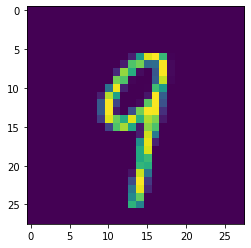

In [47]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[900])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [50]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [52]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [135]:
'''
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

'''

"\nfrom keras.layers import Activation\nmodel = Sequential()\n\n \nmodel.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))\nmodel.add(Convolution2D(10, 1, activation='relu'))\nmodel.add(Convolution2D(10, 26))\nmodel.add(Flatten())\nmodel.add(Activation('softmax'))\n\n"

In [156]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32,3,3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Convolution2D(32, 3,3, activation='relu'))
model.add(Convolution2D(32, 3,3, activation='relu'))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(32, 3,3, activation='relu'))

#model.add(Convolution2D(10, 3,3, activation='relu'))
#model.add(Convolution2D(10, 3,3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [157]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 8, 8, 10)          330       
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 1, 1, 10)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [159]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 24s 392us/step - loss: 0.1616 - acc: 0.9486
Epoch 2/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0547 - acc: 0.9836
Epoch 3/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0397 - acc: 0.9869
Epoch 4/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.0302 - acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0252 - acc: 0.9920
Epoch 6/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.0213 - acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0183 - acc: 0.9941
Epoch 8/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0156 - acc: 0.9947
Epoch 9/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0132 - acc: 0.9955
Epoch 10/10
60000/60000 [==============================] - 21s 350us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [162]:
print(score)

[0.02513988938987859, 0.9925]


In [0]:
y_pred = model.predict(X_test)

In [164]:
print(y_pred[:9])
print(y_test[:9])

[[1.3488797e-15 1.9001784e-13 2.1878139e-09 1.8494140e-10 6.1425638e-16
  6.3485080e-17 4.9890313e-24 1.0000000e+00 1.5285394e-15 7.1155926e-10]
 [1.5447510e-10 8.7682479e-11 1.0000000e+00 3.2698809e-11 3.9640529e-13
  1.0720603e-18 2.0429771e-09 2.5962480e-11 3.0352015e-10 1.8563669e-16]
 [7.8989809e-10 9.9999309e-01 2.0998344e-07 7.4220125e-08 4.5781590e-06
  4.1107546e-07 2.1152564e-07 1.1918983e-06 2.1605501e-07 2.0408830e-09]
 [9.9996364e-01 3.0651433e-11 8.0863160e-08 1.0838967e-11 7.1710895e-09
  1.6305787e-08 3.9454876e-06 4.3985739e-07 9.0795595e-08 3.1753858e-05]
 [3.9381710e-12 8.8179353e-10 2.3449303e-11 5.5174990e-11 9.9999881e-01
  4.0872470e-12 5.8587960e-13 6.7947253e-10 1.5789886e-10 1.2503048e-06]
 [1.1025235e-10 9.9994671e-01 5.0066154e-07 5.6644500e-10 7.0986528e-07
  2.3309638e-10 2.5653626e-09 5.2058182e-05 2.2049157e-08 1.2669086e-08]
 [1.8714081e-17 9.5213559e-10 1.2189925e-12 2.2013354e-16 9.9998319e-01
  3.0493433e-10 1.2023871e-16 1.4444694e-09 1.0128154e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [168]:
print(layer_dict.keys())

dict_keys(['conv2d_145', 'conv2d_146', 'max_pooling2d_17', 'conv2d_147', 'conv2d_148', 'conv2d_149', 'conv2d_150', 'flatten_22', 'activation_22'])


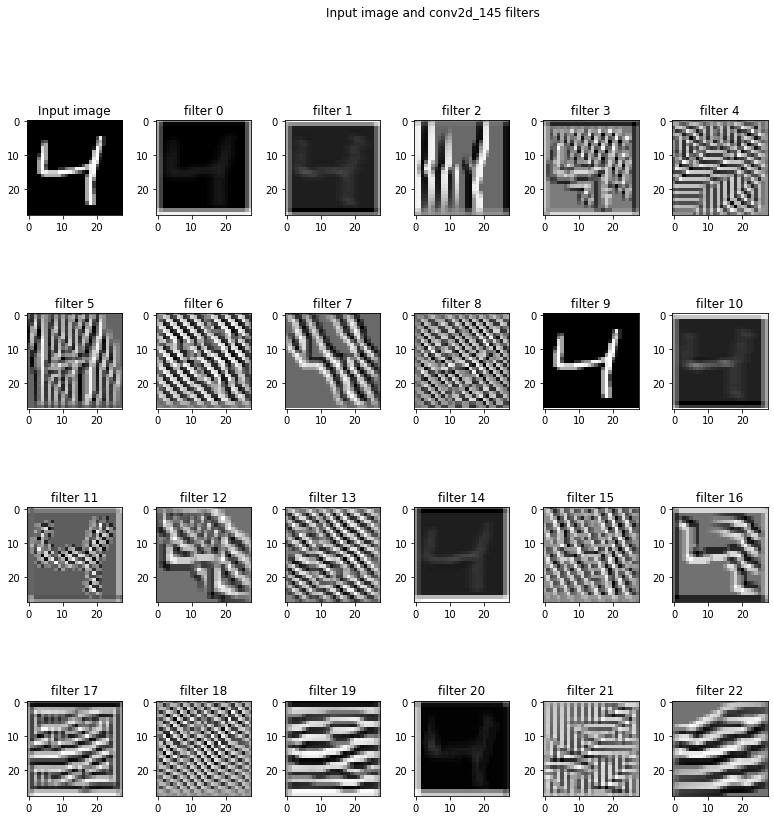

In [169]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_145'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()